In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = load_diabetes()

In [3]:
X = data.data
y = data.target
feature_names = data.feature_names
X = pd.DataFrame(X, columns=feature_names)

Text(0, 0.5, 'Frequency')

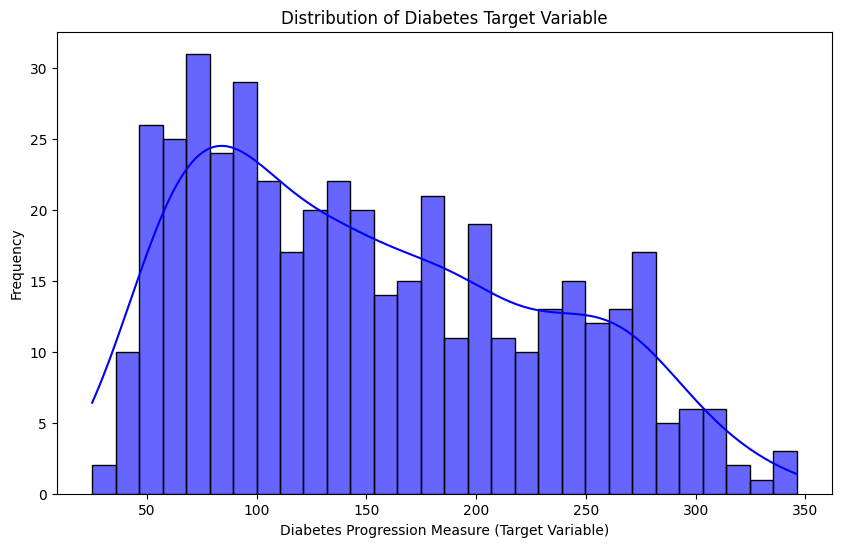

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=30, kde=True, color='blue', alpha=0.6)
plt.title('Distribution of Diabetes Target Variable')
plt.xlabel('Diabetes Progression Measure (Target Variable)')
plt.ylabel('Frequency')

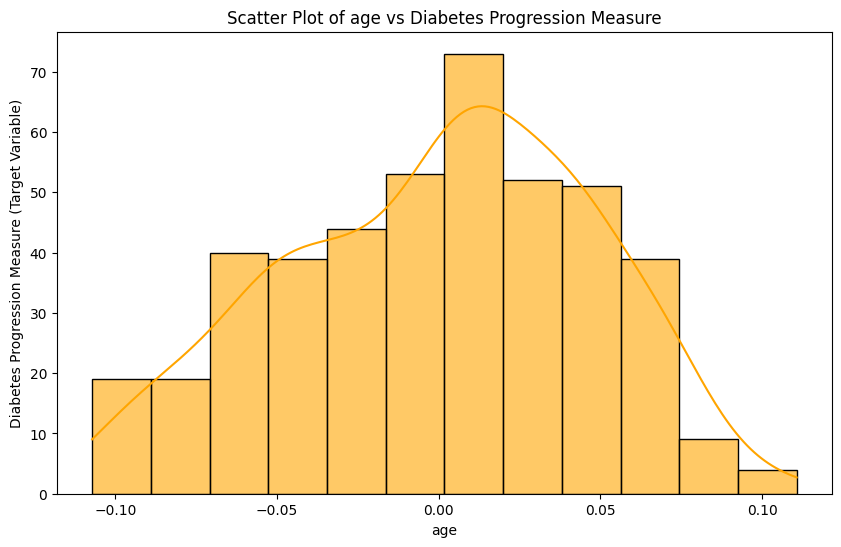

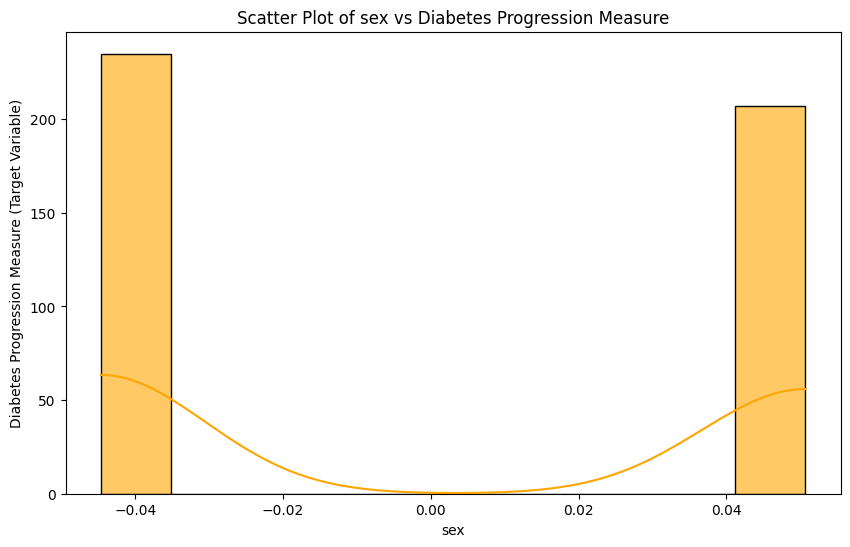

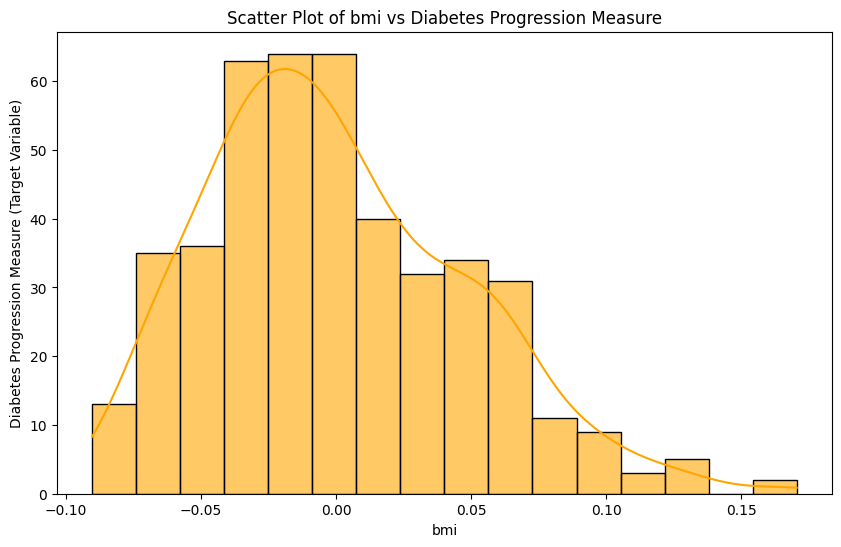

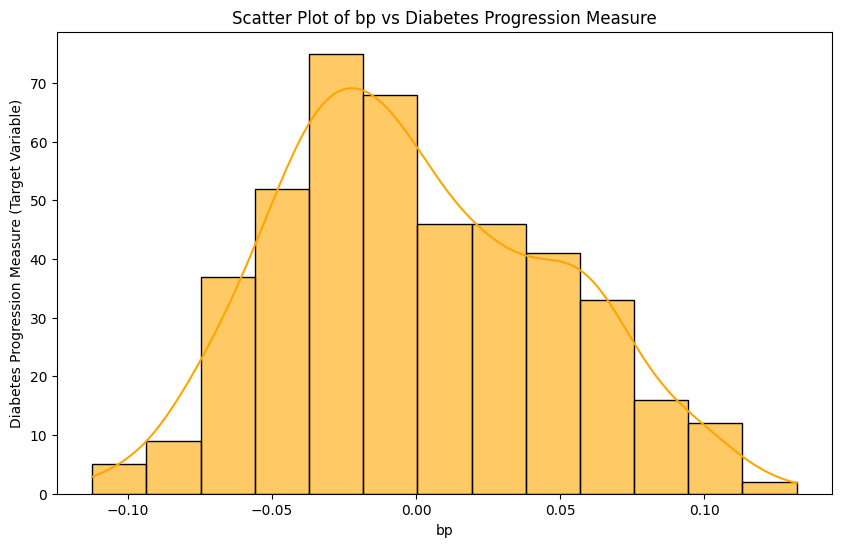

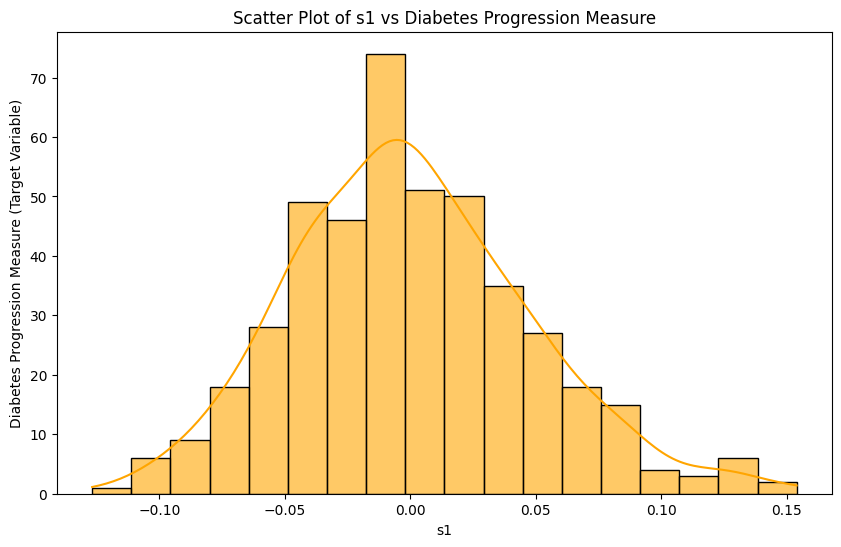

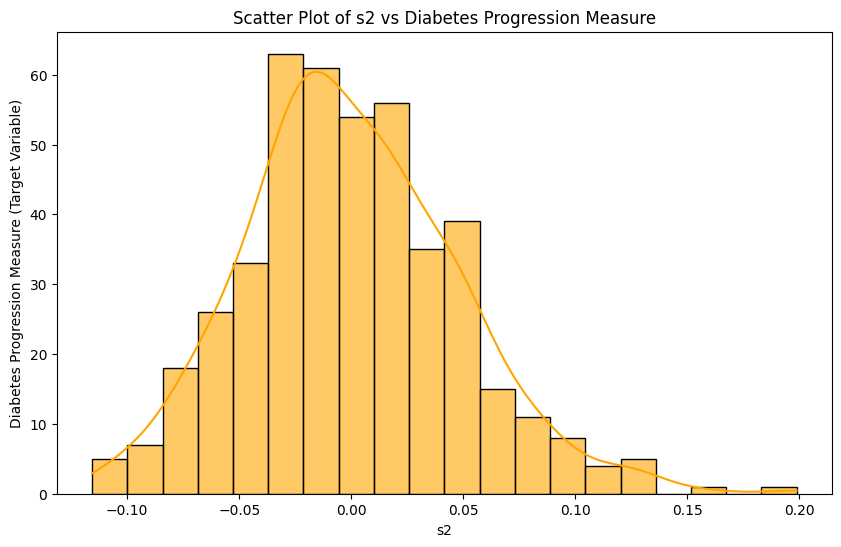

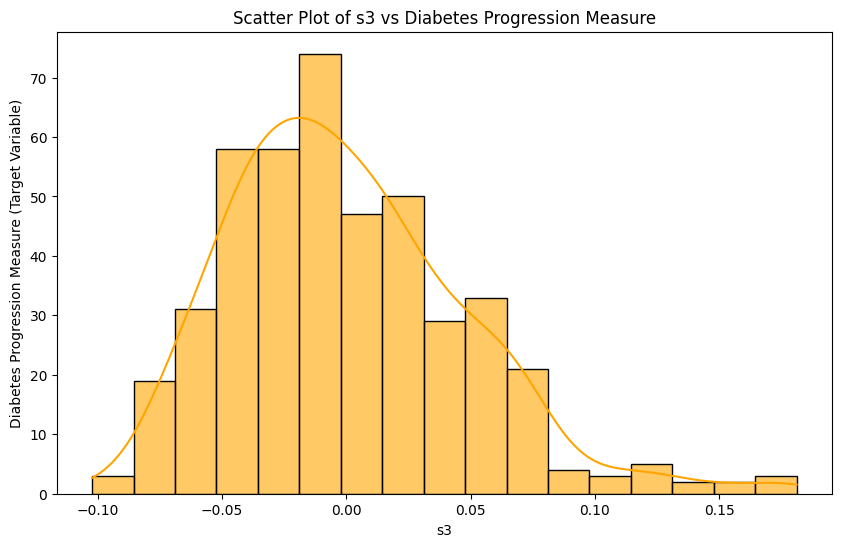

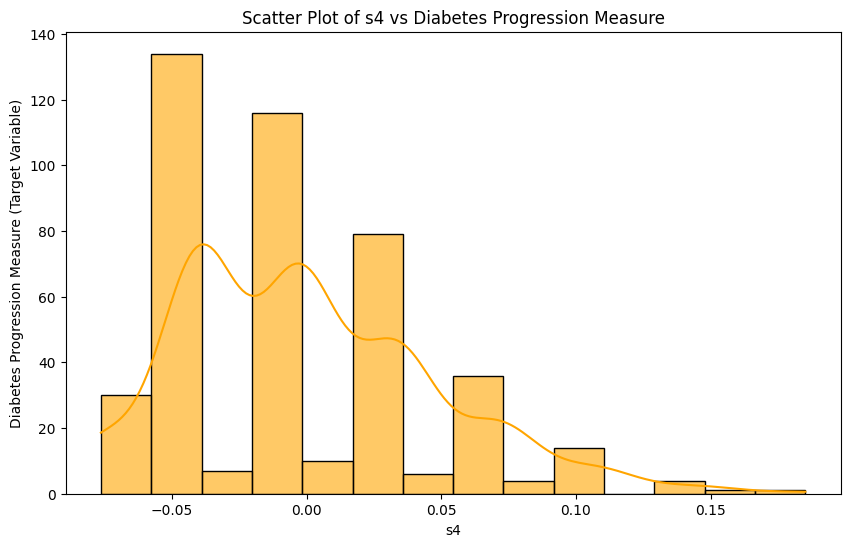

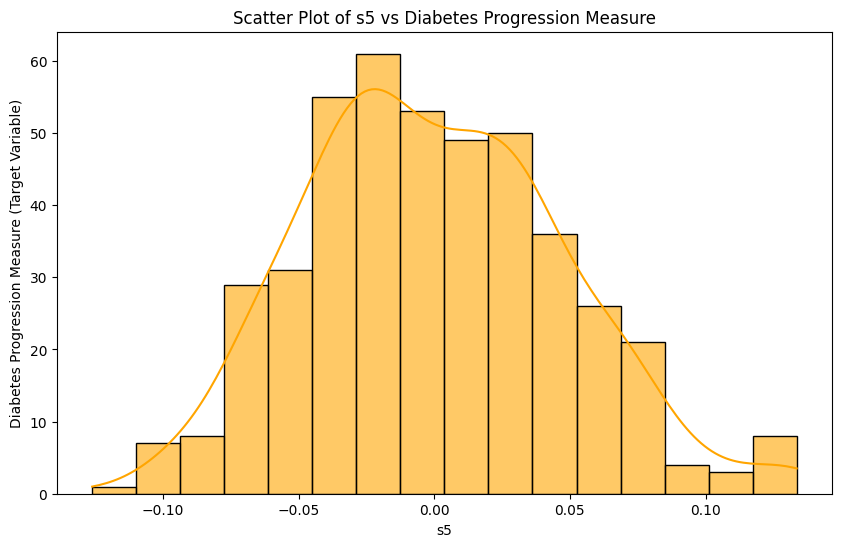

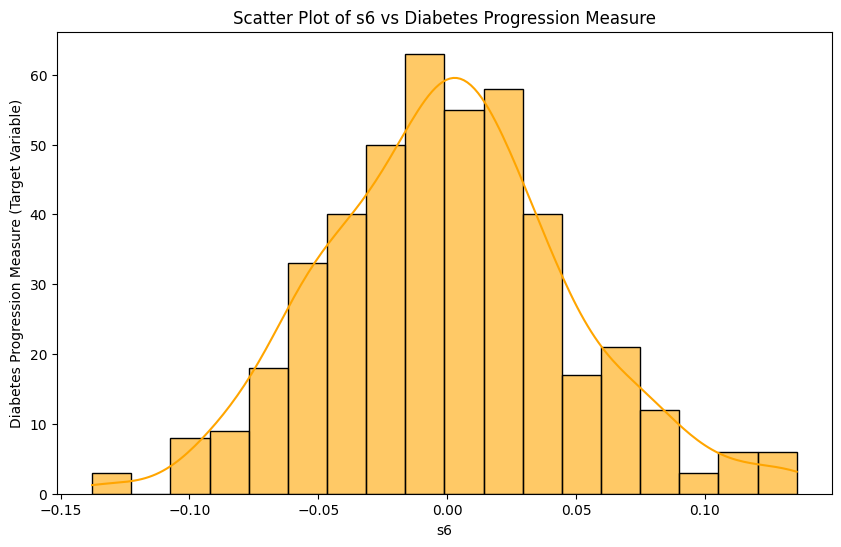

In [5]:
for i, feature in enumerate(feature_names):
    plt.figure(figsize=(10, 6))
    sns.histplot(x=X[feature], kde= True, color='orange', alpha=0.6)
    plt.title(f'Scatter Plot of {feature} vs Diabetes Progression Measure')
    plt.xlabel(feature)
    plt.ylabel('Diabetes Progression Measure (Target Variable)')
    plt.show()

In [6]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Mean Squared Error: 2900.19
Mean Squared Error: 3077.42
Mean Squared Error: 3403.58
Mean Squared Error: 5311.21


Text(0, 0.5, 'Mean Squared Error')

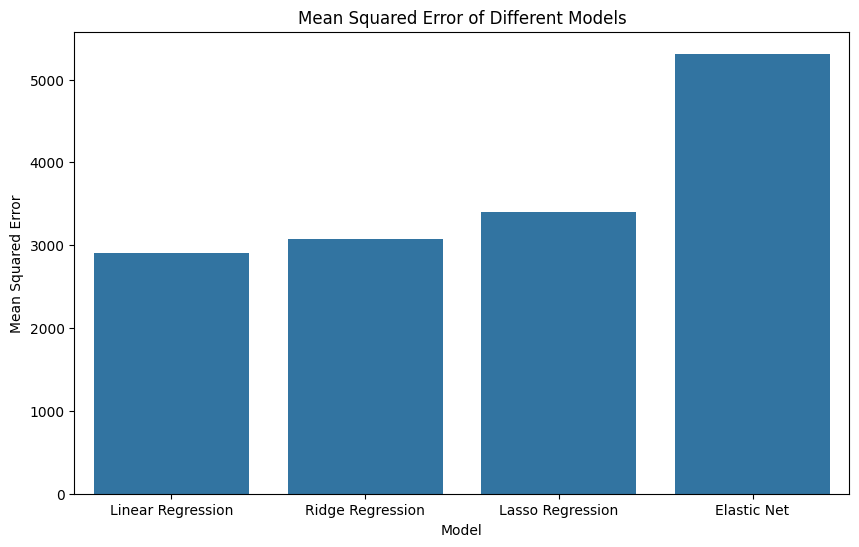

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse:.2f}')
    return mse


# Train and evaluate Linear Regression model
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net': ElasticNet()
}
mse_results = {}
for model_name, model in models.items():
    mse = train_and_evaluate(model, X_train, y_train, X_test, y_test)
    mse_results[model_name] = mse
mse_df = pd.DataFrame(mse_results, index=['MSE'])
mse_df = mse_df.T
plt.figure(figsize=(10, 6))
sns.barplot(x=mse_df.index, y='MSE', data=mse_df)
plt.title('Mean Squared Error of Different Models')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')


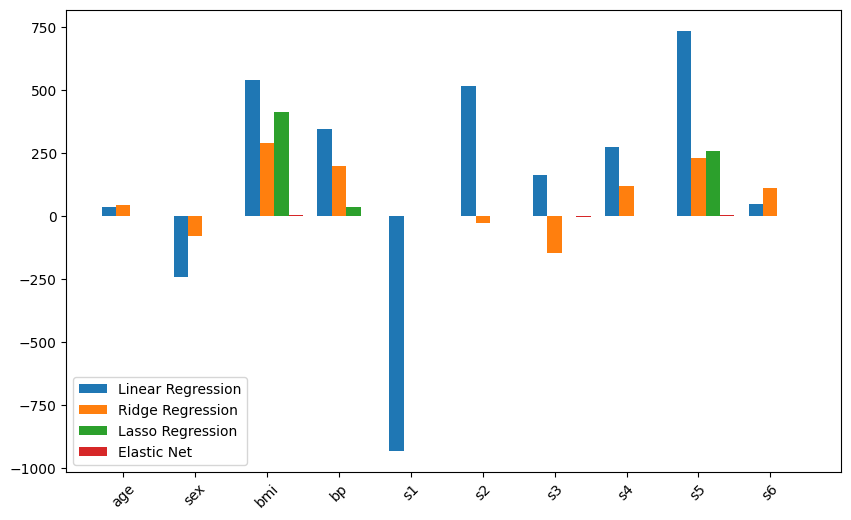

In [8]:
coefs = [model.coef_ for model in models.values()]
plt.figure(figsize=(10, 6))
x = np.arange(len(feature_names))  # Number of features
for i, model in enumerate(models.keys()):
    plt.bar(x+i*0.2, coefs[i], width=0.2, label=model)

plt.xticks(x + 0.2, feature_names, rotation=45)
plt.legend()

Mean Squared Error: 2900.19
Mean Squared Error: 2856.36
Mean Squared Error: 2855.12
Mean Squared Error: 2868.87
Mean Squared Error: 2891.22
Mean Squared Error: 2918.63
Mean Squared Error: 2949.02
Mean Squared Error: 2981.10
Mean Squared Error: 3014.08
Mean Squared Error: 3047.41
Mean Squared Error: 3080.74
Mean Squared Error: 3113.85
Mean Squared Error: 3146.57
Mean Squared Error: 3178.79
Mean Squared Error: 3210.45
Mean Squared Error: 3241.50
Mean Squared Error: 3271.91
Mean Squared Error: 3301.66
Mean Squared Error: 3330.75
Mean Squared Error: 3359.18
Mean Squared Error: 3386.95
Mean Squared Error: 3414.07
Mean Squared Error: 3440.56
Mean Squared Error: 3466.42
Mean Squared Error: 3491.68
Mean Squared Error: 3516.34
Mean Squared Error: 3540.41
Mean Squared Error: 3563.93
Mean Squared Error: 3586.89
Mean Squared Error: 3609.32
Mean Squared Error: 3631.23
Mean Squared Error: 3652.64
Mean Squared Error: 3673.56
Mean Squared Error: 3694.00
Mean Squared Error: 3713.99
Mean Squared Error: 

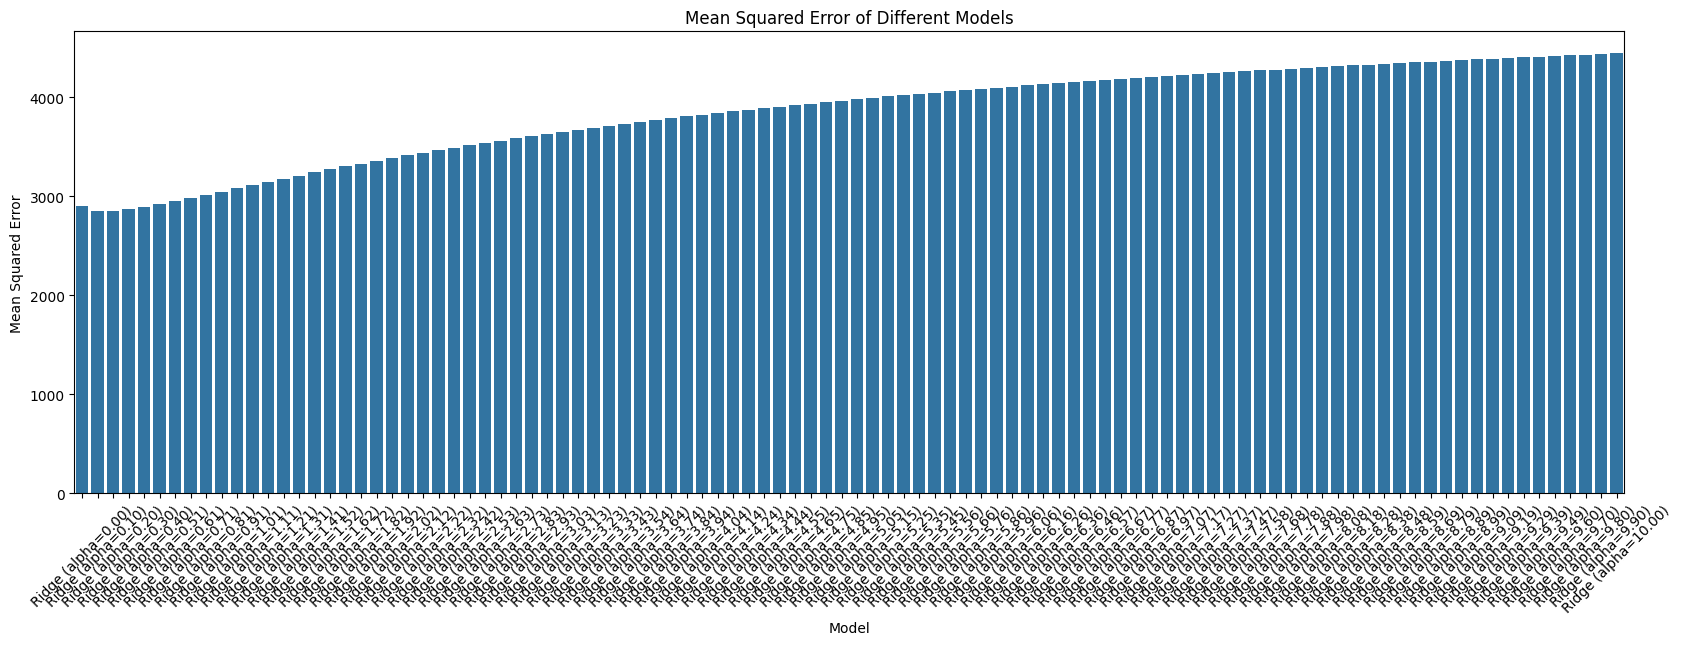

In [9]:
alphas = np.linspace(0, 10, 100)
mse_results = {}

for alpha in alphas:
    model = Ridge(alpha=alpha)
    mse = train_and_evaluate(model, X_train, y_train, X_test, y_test)
    mse_results[f'Ridge (alpha={alpha:.2f})'] = mse


mse_df = pd.DataFrame(mse_results, index=['MSE']).T

# Wizualizacja wyników
plt.figure(figsize=(20, 6))
sns.barplot(x=mse_df.index, y='MSE', data=mse_df)
plt.title('Mean Squared Error of Different Models')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
plt.show()

Mean Squared Error: 2853.34
Mean Squared Error: 3416.92
Mean Squared Error: 3835.55
Mean Squared Error: 4112.19
Mean Squared Error: 4306.46
Mean Squared Error: 4449.85
Mean Squared Error: 4559.84
Mean Squared Error: 4646.80
Mean Squared Error: 4717.25
Mean Squared Error: 4775.47


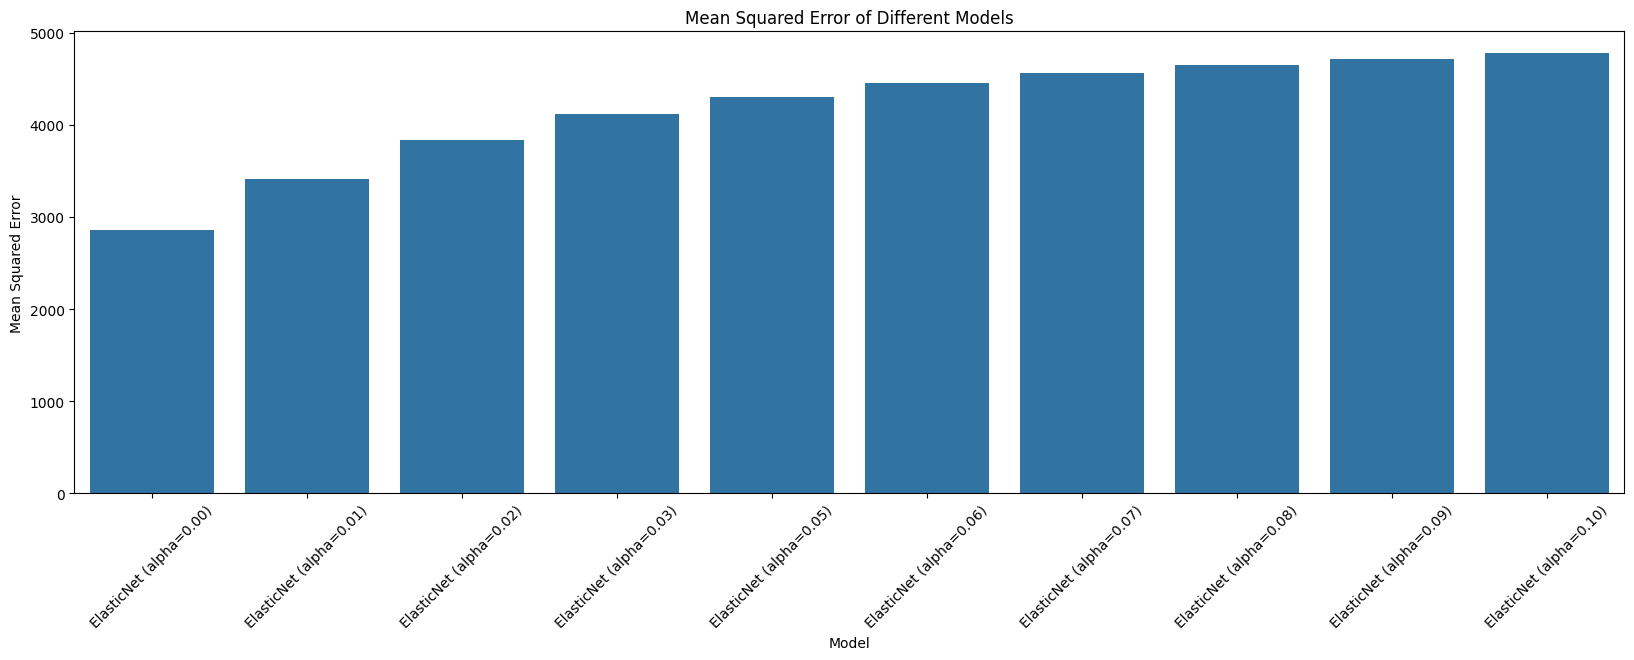

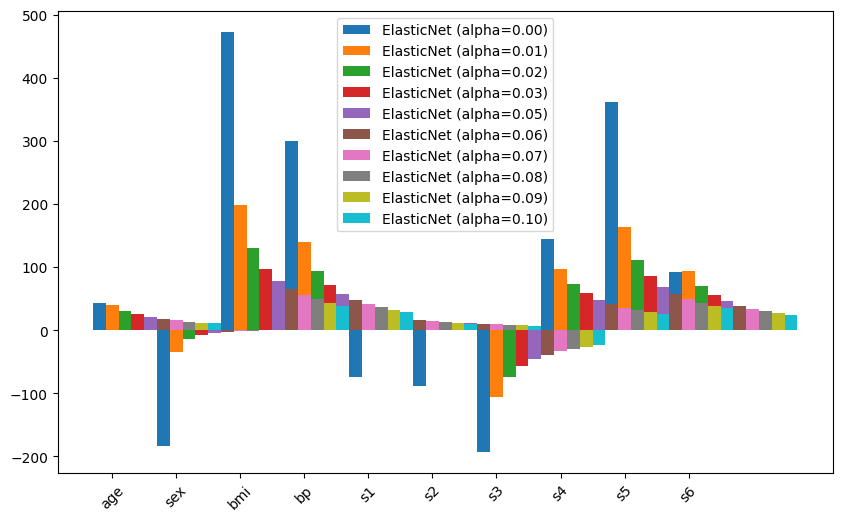

In [10]:
alphas = np.linspace(0.001, 0.1, 10)

coefs = []
mse_results = {}
models = {}

for alpha in alphas:
    model = ElasticNet(alpha=alpha)
    mse = train_and_evaluate(model, X_train, y_train, X_test, y_test)
    models[f'ElasticNet (alpha={alpha:.2f})'] = model
    coefs.append(model.coef_)
    mse_results[f'ElasticNet (alpha={alpha:.2f})'] = mse


mse_df = pd.DataFrame(mse_results, index=['MSE']).T

# Wizualizacja wyników
plt.figure(figsize=(20, 6))
sns.barplot(x=mse_df.index, y='MSE', data=mse_df)
plt.title('Mean Squared Error of Different Models')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10, 6))
x = np.arange(len(feature_names))  # Number of features
for i, model in enumerate(models.keys()):
    plt.bar(x+i*0.2, coefs[i], width=0.2, label=model)

plt.xticks(x + 0.2, feature_names, rotation=45)
plt.legend()

Mean Squared Error: 2882.29
Mean Squared Error: 2876.81
Mean Squared Error: 2872.75
Mean Squared Error: 2869.31
Mean Squared Error: 2866.31
Mean Squared Error: 2863.70
Mean Squared Error: 2861.43
Mean Squared Error: 2859.49
Mean Squared Error: 2857.85
Mean Squared Error: 2856.49


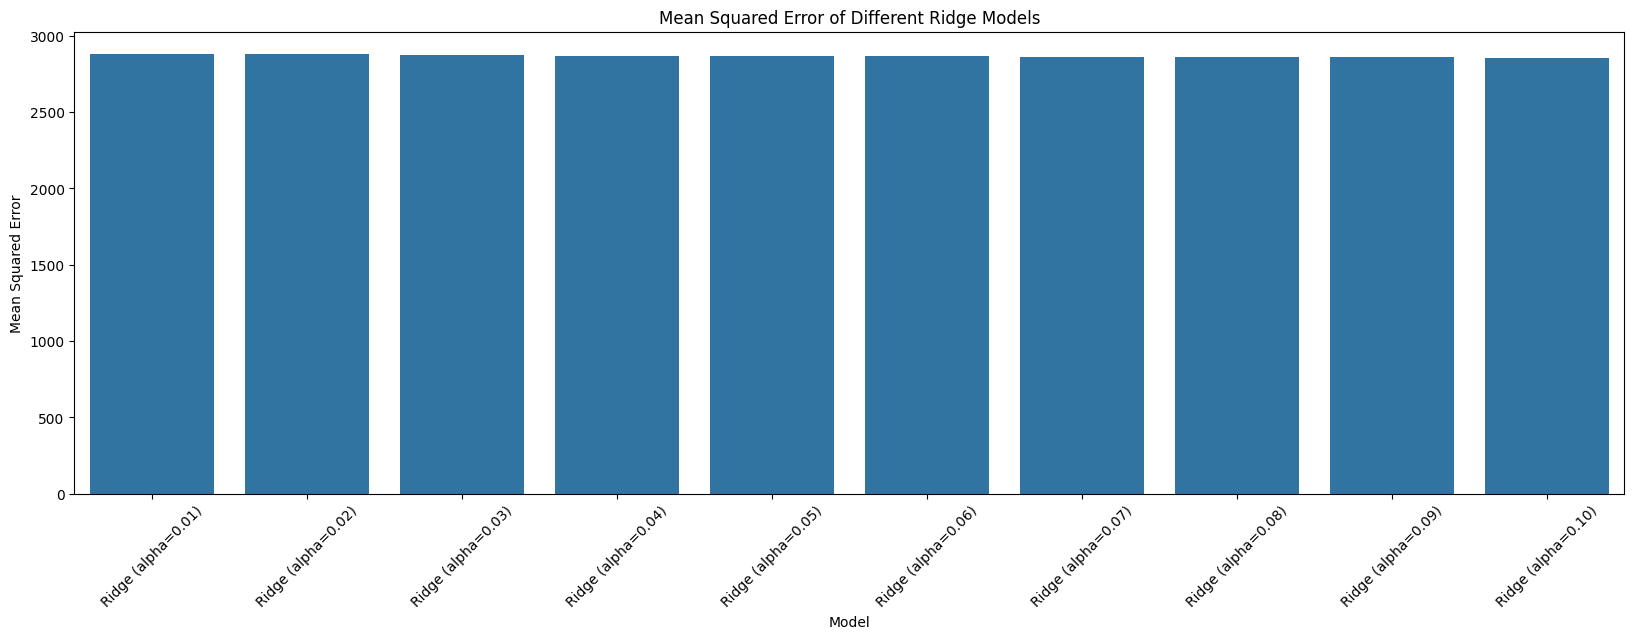

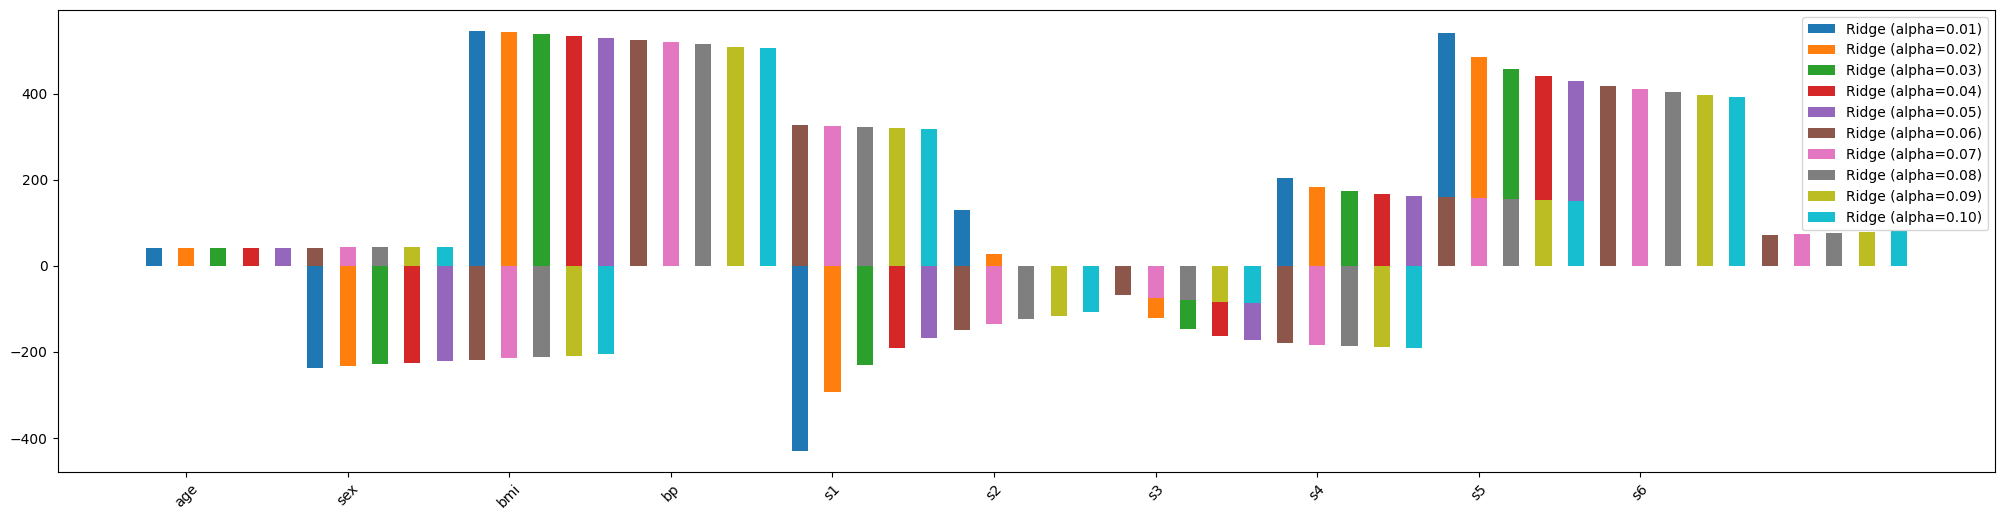

In [11]:
alphas = np.linspace(0.01, 0.1, 10)

coefs = []
mse_results = {}
models = {}

for alpha in alphas:
    model = Ridge(alpha=alpha)
    mse = train_and_evaluate(model, X_train, y_train, X_test, y_test)
    models[f'Ridge (alpha={alpha:.2f})'] = model
    coefs.append(model.coef_)
    mse_results[f'Ridge (alpha={alpha:.2f})'] = mse


mse_df = pd.DataFrame(mse_results, index=['MSE']).T

# Visualization of results
plt.figure(figsize=(20, 6))
sns.barplot(x=mse_df.index, y='MSE', data=mse_df)
plt.title('Mean Squared Error of Different Ridge Models')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(25, 6))
x = np.arange(len(feature_names))  # Number of features
for i, model in enumerate(models.keys()):
    plt.bar(x+i*0.2, coefs[i], width=0.1, label=model)

plt.xticks(x + 0.2, feature_names, rotation=45)
plt.legend()

In [12]:
X['s7'] = X['s6']*0.9 + np.random.normal(0, 0.01, len(X))

<Axes: >

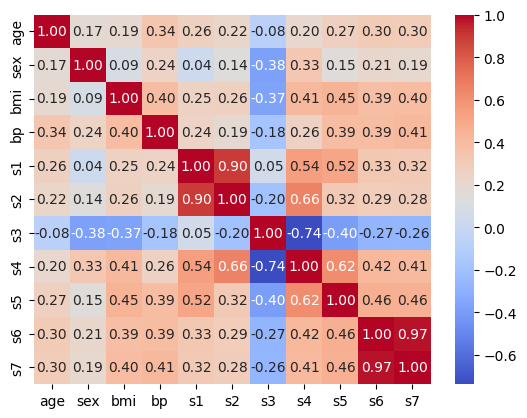

In [13]:
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f')